In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
def perc_error(teo, exp):
    return 100*abs(teo-exp)/teo

0.494949541508
0.993062199207


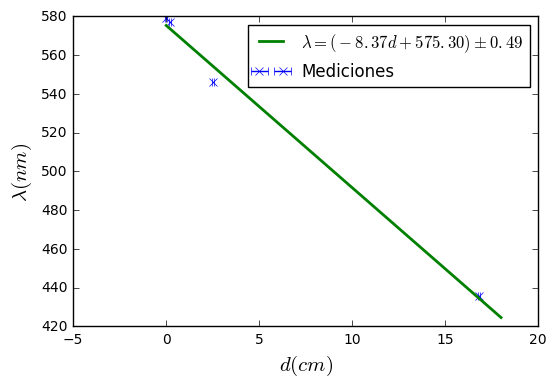

In [36]:
amarilla = 579.
verde = 546.1
am_verd_nm = verde-amarilla #nm
am_verd = 2.5 #cm
en_nm = np.array([579,577, 546.1, 435.8])
en_cm=np.array([0, 0.2, 2.5, 16.8])
plt.errorbar(en_cm, en_nm,xerr=0.05,marker ='x' , linestyle='None', label='Mediciones')
slope, intercept, r_value, p_value, std_err = stats.linregress(en_cm, en_nm)
def cm_to_nm(dist_cm):
    return slope*dist_cm+intercept
x = np.linspace(0, 18, 100)
plt.plot(x, cm_to_nm(x), lw=2, \
         label='$\lambda = (%.2fd + %.2f)\pm %.2f$'%(slope, intercept, std_err))
plt.xlabel('$d (cm)$', fontsize=15)
plt.ylabel('$\lambda (nm)$', fontsize=15)
plt.legend(loc=0)
plt.gcf()
plt.savefig('lambda.png', dpi=300)
print std_err
print r_value**2

In [27]:
print '$d(\pm0.05cm)$ & $\lambda(nm)$\\\\\\hline'
for i in range(len(en_cm)):
    print '%.1f & %.1f\\\\'%(en_cm[i], en_nm[i])

$d(\pm0.05cm)$ & $\lambda(nm)$\\\hline
0.0 & 579.0\\
0.2 & 577.0\\
2.5 & 546.1\\
16.8 & 435.8\\


In [35]:
He_cm = np.array([0.3, 8.2,9.4, 12.7, 17])
print cm_to_nm(He_cm)
He_nm=np.array([587.5, 501.5, 492.1, 471.3, 447.1])
He_cm_ = {'amarillo':0.3, 'cyan1':8.2, 'cyan2':9.4, 'azul':12.7,'morado':17}
print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_{teo}(nm)$&error\\\\\\hline'%std_err
for i in range(len(He_cm)):
    print '%.1f & %.2f & %.2f & %.2f\\\\'%(He_cm[i], \
                                           cm_to_nm(He_cm)[i],\
                                           He_nm[i], \
                                           100*abs(He_nm[i]-cm_to_nm(He_cm)[i])/He_nm[i])

[ 572.78783904  506.63014977  496.58088051  468.94539005  432.93550855]
$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)$&error\\\hline
0.3 & 572.79 & 587.50 & 2.50\\
8.2 & 506.63 & 501.50 & 1.02\\
9.4 & 496.58 & 492.10 & 0.91\\
12.7 & 468.95 & 471.30 & 0.50\\
17.0 & 432.94 & 447.10 & 3.17\\


In [41]:
H_cm_={'roja':-3.5, 'cyan':10.3}
H_cm=np.array([10.3])
print cm_to_nm(H_cm)
H_nm = np.array([486.1])
Rydberg= (cm_to_nm(H_cm[0])*1e-9*(2**-2 - 4**-2))**-1
Rydberg_teo= (H_nm[0]*1e-9*(2**-2 - 4**-2))**-1
ryd_unc = Rydberg*(std_err/cm_to_nm(H_cm[0]))
print ryd_unc
print Rydberg, Rydberg_teo
print 100*abs(Rydberg_teo-Rydberg)/Rydberg_teo
#Rydberg_teo=10973731.6
print Rydberg-ryd_unc
print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_{teo}(nm)\\\\\\hline$'%std_err
for i in range(len(H_cm)):
    print '%.1f & %.2f & %.2f\\\\'%(H_cm[i], cm_to_nm(H_cm)[i], H_nm[i])

[ 489.04392857]
11037.3270419
10905632.4428 10971679.3527
0.601976304141
10894595.1158
$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)\\\hline$
10.3 & 489.04 & 486.10\\


In [54]:
Ne_cm = np.array([0, 0.3, 0.7, 1, 1.7,  7, 12.7])
Ne_cm_debiles=np.array([1.4,2.5, 3.1, 6.5])
Ne_nm = np.array([5764.4188,5748.2985, 5719.2248,\
                  5656.6588, 5562.7662,5144.9384,4704.3949])
Ne_nm/=10

print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_\
{teo}(nm)$&error\\\\\\hline$'%std_err
for i in range(len(Ne_cm)):
    print '%.1f & %.2f & %.2f & %.2f\\\\'%(Ne_cm[i],\
                                           cm_to_nm(Ne_cm)[i],\
                                           Ne_nm[i], perc_error(Ne_nm[i],\
                                                                cm_to_nm(Ne_cm)[i]))

$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)$&error\\\hline$
0.0 & 575.30 & 576.44 & 0.20\\
0.3 & 572.79 & 574.83 & 0.36\\
0.7 & 569.44 & 571.92 & 0.43\\
1.0 & 566.93 & 565.67 & 0.22\\
1.7 & 561.06 & 556.28 & 0.86\\
7.0 & 516.68 & 514.49 & 0.42\\
12.7 & 468.95 & 470.44 & 0.32\\


In [55]:
Xe_cm = np.array([12, 14.7, 15.7, 16.6])
Xe_cm_debiles=np.array([13.1, 13.5])
Xe_nm = np.array([4734.152, 4521.86, 4448.13, 4369.20])
Xe_nm/=10
print cm_to_nm(Xe_cm)
print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_\
{teo}(nm)$&error\\\\\\hline$'%std_err
for i in range(len(Xe_cm)):
    print '%.1f & %.2f & %.2f & %.2f\\\\'%(Xe_cm[i],\
                                           cm_to_nm(Xe_cm)[i],\
                                           Xe_nm[i], perc_error(Xe_nm[i],\
                                                                cm_to_nm(Xe_cm)[i]))

[ 474.80746379  452.19660796  443.82221691  436.28526497]
$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)$&error\\\hline$
12.0 & 474.81 & 473.42 & 0.29\\
14.7 & 452.20 & 452.19 & 0.00\\
15.7 & 443.82 & 444.81 & 0.22\\
16.6 & 436.29 & 436.92 & 0.15\\


In [57]:
Ar_cm={'rojo':0.5, 'rojo2':2.5,\
       'amarilla':3.2,  'cyan1':9.2, 'cyan2':13.2, 'azul':15.6, 'morada':19.3}
Ar_cm_debiles={'cyan':5.2}
Ar_nm = np.array([5650.704, 5558.702,5495.874, 4965.080 , 4637.233, 4448.879 , 4131.724])
Ar_nm/=10
print cm_to_nm(np.array(sorted(Ar_cm.values())))
print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_{teo}(nm)\\\\\\hline$'%std_err
for i in range(len(Ar_cm.values())):
    print '%.1f & %.2f & %.2f & %.2f\\\\'%(sorted(Ar_cm.values())[i],\
                                    cm_to_nm(np.array(sorted(Ar_cm.values())))[i],\
                                    Ar_nm[i], perc_error(Ar_nm[i], cm_to_nm(np.array(sorted(Ar_cm.values())))[i]))

[ 571.11296083  554.36417874  548.502105    498.25575872  464.75819453
  444.65965601  413.67440914]
$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)\\\hline$
0.5 & 571.11 & 565.07 & 1.07\\
2.5 & 554.36 & 555.87 & 0.27\\
3.2 & 548.50 & 549.59 & 0.20\\
9.2 & 498.26 & 496.51 & 0.35\\
13.2 & 464.76 & 463.72 & 0.22\\
15.6 & 444.66 & 444.89 & 0.05\\
19.3 & 413.67 & 413.17 & 0.12\\


In [58]:
Kr_cm = {'amarilla':3.5, 'verde':5.8, 'morada':19.8}
Kr_nm = np.array([5468.17, 5308.66, 4098.729])
Kr_nm/=10
print cm_to_nm(np.array(sorted(Kr_cm.values())))
print '$d(\pm0.05cm)$&$\lambda(\pm%.2f nm)$&$\lambda_{teo}(nm)\\\\\\hline$'%std_err
for i in range(len(Kr_cm.values())):
    print '%.1f & %.2f & %.2f & %.2f\\\\'%(sorted(Kr_cm.values())[i],\
                                    cm_to_nm(np.array(sorted(Kr_cm.values())))[i],\
                                    Kr_nm[i], perc_error(Kr_nm[i], cm_to_nm(np.array(sorted(Kr_cm.values())))[i]))

[ 545.98978769  526.72868828  409.48721361]
$d(\pm0.05cm)$&$\lambda(\pm0.49 nm)$&$\lambda_{teo}(nm)\\\hline$
3.5 & 545.99 & 546.82 & 0.15\\
5.8 & 526.73 & 530.87 & 0.78\\
19.8 & 409.49 & 409.87 & 0.09\\
